<h3> Supplement: Is <i>Path of Exile</i>'s player marketplace a Perfectly Competitive Market Economy?</h3>
<h4>Gregory Hinds - February 2025</h4>
This is the notebook version of this article, from my portfolio: <a href="https://ysadore.github.io/poe_marketEconomy.html"> link</a>.
<br>
In the main article notebook, we tried and answer the question: does Path Of Exile's economy bear the charateristics of a perfectly competitive market economy? We'll be looking solely at the league economies to try and answer this question.
In this notebook, we'll take a make a few graphs detailing market behaviours.
<br>
If you're not interested in the data preparation, skip straight to Section 1.
This notebooks handles the preparation of data from https://poe.ninja/data into formats we can use more easily for analysis and visualisation.

<i> Now, let's get the data from my github repo. Unfortunately the historical data is not available via API, so we're importing it from csvs.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
leagues_list = ['Affliction', 'Ancestor', 'Crucible', 'Kalandra', 'Necropolis', 'Sanctum']
leagues = {}
for league in leagues_list:
    path = r'https://github.com/Ysadore/PoE_EconomyAnalysis/raw/refs/heads/main/' + league + '%20currency.csv'
    leagues[league] = pd.read_csv(path, delimiter=';')

<i> We now have a dictionary with keys as the league names, and values as the dfs with currency history for that league. <br>
Now, let's check that these are similarly structured.

In [3]:
for league in leagues:
    print(leagues[league].columns)

Index(['League', 'Date', 'Get', 'Pay', 'Value', 'Confidence'], dtype='object')
Index(['League', 'Date', 'Get', 'Pay', 'Value', 'Confidence'], dtype='object')
Index(['League', 'Date', 'Get', 'Pay', 'Value', 'Confidence'], dtype='object')
Index(['League', 'Date', 'Get', 'Pay', 'Value', 'Confidence'], dtype='object')
Index(['League', 'Date', 'Get', 'Pay', 'Value', 'Confidence'], dtype='object')
Index(['League', 'Date', 'Get', 'Pay', 'Value', 'Confidence'], dtype='object')


In [4]:
for league in leagues:
    print(leagues[league].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37251 entries, 0 to 37250
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   League      37251 non-null  object 
 1   Date        37251 non-null  object 
 2   Get         37251 non-null  object 
 3   Pay         37251 non-null  object 
 4   Value       37251 non-null  float64
 5   Confidence  37251 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37379 entries, 0 to 37378
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   League      37379 non-null  object 
 1   Date        37379 non-null  object 
 2   Get         37379 non-null  object 
 3   Pay         37379 non-null  object 
 4   Value       37379 non-null  float64
 5   Confidence  37379 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.7+ MB
None
<class 'pandas

<i> They've all got the same headers. Excellent. <br>
<i> From our game knowledge, we know that different league-specific currency items are present in each dataframe. For the purposes of this analysis, let's focus on some of the core currency items that exist in all the leagues, so we can compare price trends between leagues. <br>
They are: Mirror of Kalandra, Exalted Orbs, Chaos Orbs, Vaal Orbs, Regal Orbs and Orbs of Fusing. <br>
We may narrow this list later depending on the results of our analysis.

In [5]:
orbs = ['Mirror of Kalandra', 'Divine Orb', 'Chaos Orb', 'Vaal Orb', 'Regal Orb', 'Orb of Fusing', 'Chromatic Orb', 'Orb of Alteration', 'Cartographer\'s Chisel', 'Orb of Scouring', 'Orb of Alchemy']


<i> So, let's filter all our dataframes down to exchanges involving only these orbs.

In [6]:
for league in leagues:
    #we can just take a shallow copy of the df here to improve legibility; we could continue using leagues[league] if we wanted
    df = leagues[league]
    leagues[league] = df[(df['Get'].isin(orbs)) & (df['Pay'].isin(orbs))]

In [7]:
for league in leagues:
    print(leagues[league].info())

<class 'pandas.core.frame.DataFrame'>
Index: 2194 entries, 0 to 18359
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   League      2194 non-null   object 
 1   Date        2194 non-null   object 
 2   Get         2194 non-null   object 
 3   Pay         2194 non-null   object 
 4   Value       2194 non-null   float64
 5   Confidence  2194 non-null   object 
dtypes: float64(1), object(5)
memory usage: 120.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 2194 entries, 0 to 21846
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   League      2194 non-null   object 
 1   Date        2194 non-null   object 
 2   Get         2194 non-null   object 
 3   Pay         2194 non-null   object 
 4   Value       2194 non-null   float64
 5   Confidence  2194 non-null   object 
dtypes: float64(1), object(5)
memory usage: 120.0+ KB
None
<class 'pandas.core.fr

<i> We can see from the csv that the League value is "Hardcore" throughout. Let's replace that with a meaningful value.

In [8]:
for league in leagues:
    leagues[league]['League'] = league

C:\Users\Greg\AppData\Local\Temp\ipykernel_40612\153115580.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leagues[league]['League'] = league


<i> We do still have different amounts of data between the leagues, though. We'll need to think about this carefully when we come to analysing the trends. <br>
We can see all the dataframes are correctly typed other than date, but we can be more helpful and turn them into pandas categories.
Til now it's been helpful to have these as separate dataframes, better to observe the differences. However, let's now concatentate them into one.


In [9]:
#create a list of all the dfs
dfs = list(leagues.values())

league_currency = pd.concat(dfs)
league_currency.info()
    

<class 'pandas.core.frame.DataFrame'>
Index: 13840 entries, 0 to 21356
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   League      13840 non-null  object 
 1   Date        13840 non-null  object 
 2   Get         13840 non-null  object 
 3   Pay         13840 non-null  object 
 4   Value       13840 non-null  float64
 5   Confidence  13840 non-null  object 
dtypes: float64(1), object(5)
memory usage: 756.9+ KB


In [10]:
league_currency

,League,Date,Get,Pay,Value,Confidence
0,Affliction,2023-12-08,Orb of Alchemy,Chaos Orb,0.50000,High
1,Affliction,2023-12-09,Orb of Alchemy,Chaos Orb,0.20000,High
2,Affliction,2023-12-10,Orb of Alchemy,Chaos Orb,0.18000,High
3,Affliction,2023-12-11,Orb of Alchemy,Chaos Orb,0.13333,High
4,Affliction,2023-12-12,Orb of Alchemy,Chaos Orb,0.12500,High
...,...,...,...,...,...,...
21352,Sanctum,2023-03-31,Chaos Orb,Mirror of Kalandra,0.00001,High
21353,Sanctum,2023-04-01,Chaos Orb,Mirror of Kalandra,0.00001,High
21354,Sanctum,2023-04-02,Chaos Orb,Mirror of Kalandra,0.00001,High
21355,Sanctum,2023-04-03,Chaos Orb,Mirror of Kalandra,0.00001,High


In [11]:
league_cat = pd.CategoricalDtype(categories=league_currency['League'].unique(), ordered=False)
confidence_cat = pd.CategoricalDtype(categories=league_currency['Confidence'].unique(), ordered=False)

league_currency['League'] = league_currency['League'].astype(league_cat)
league_currency['Date'] = pd.to_datetime(league_currency['Date'])
league_currency['Confidence'] = league_currency['Confidence'].astype(confidence_cat)

In [12]:
league_currency

,League,Date,Get,Pay,Value,Confidence
0,Affliction,2023-12-08,Orb of Alchemy,Chaos Orb,0.50000,High
1,Affliction,2023-12-09,Orb of Alchemy,Chaos Orb,0.20000,High
2,Affliction,2023-12-10,Orb of Alchemy,Chaos Orb,0.18000,High
3,Affliction,2023-12-11,Orb of Alchemy,Chaos Orb,0.13333,High
4,Affliction,2023-12-12,Orb of Alchemy,Chaos Orb,0.12500,High
...,...,...,...,...,...,...
21352,Sanctum,2023-03-31,Chaos Orb,Mirror of Kalandra,0.00001,High
21353,Sanctum,2023-04-01,Chaos Orb,Mirror of Kalandra,0.00001,High
21354,Sanctum,2023-04-02,Chaos Orb,Mirror of Kalandra,0.00001,High
21355,Sanctum,2023-04-03,Chaos Orb,Mirror of Kalandra,0.00001,High


<i> We've got one more job before we're ready. The date field records the true date that exchange rate was observed, but most of the leagues are three months long and won't overlap in time. So we'll need to calculate some way of being able to compare them. We'll use Days Since Start of League.

In [13]:
def getDaysSinceStartOfThisLeague(thisLeague, thisDate):
    league_start_date = min(league_currency[league_currency['League'] == thisLeague]['Date'])
    days_since_start = thisDate - league_start_date
    return days_since_start

In [14]:
league_currency['Days Since Start of League'] = league_currency.apply(lambda row: getDaysSinceStartOfThisLeague(row['League'], row['Date']), axis=1)

#then convert the timedelta into the number of days elapsed, as that's all the granularity we have and need
league_currency['Days Since Start of League'] = league_currency['Days Since Start of League'].dt.days

In [15]:
league_currency.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13840 entries, 0 to 21356
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   League                      13840 non-null  category      
 1   Date                        13840 non-null  datetime64[ns]
 2   Get                         13840 non-null  object        
 3   Pay                         13840 non-null  object        
 4   Value                       13840 non-null  float64       
 5   Confidence                  13840 non-null  category      
 6   Days Since Start of League  13840 non-null  int64         
dtypes: category(2), datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 676.1+ KB


<h2> Section 1: Price Development over the League</h2>

Now that we've prepared our data a bit, let's see what sort of price, supply and demand mechanisms we can see at play in exchange rates between the different currency items during the league.
Let's start by looking at the exchange rate of Chaos Orbs to Divine Orbs.

In [16]:
df_chart_divcha = league_currency[(league_currency['Get'] == "Divine Orb") & (league_currency['Pay'] == "Chaos Orb")]

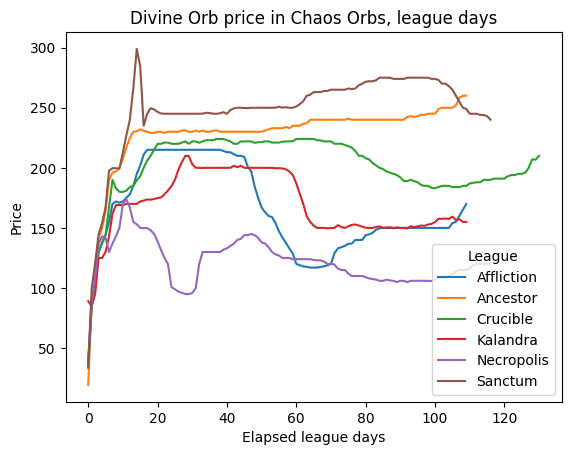

In [30]:
sns.lineplot(data=df_chart_divcha, x='Days Since Start of League', y='Value', hue='League')
u = plt.title("Divine Orb price in Chaos Orbs, league days")
w = plt.xlabel("Elapsed league days")
y = plt.ylabel("Price")



<i> What does this tell us? 
<ul>
    <li> <i>Like all the graphs we're about to see, the market undergoes rapid changes for approxiamtely the first 20 days while players get established in the league. In this time players canny enough to buy a Divine Orb will see it rapidly appreciate over the next fortnight. </i></li>
    <li> <i> After this period the prices generally stabilise, though the price at which it does so is variable. This will depend ion the exact mechanics of the league - for example, Necropolis had mechanics allowing for very efficient collection of Divine Orbs. This will have increased the relative supply and thus reduced the cost. </i> </li>
    <li>  <i>After the initial stabilisation, prices generally shift slowly. </i> </li>
</ul>
<i> </u>Let's annotate that graph with these apparent phases.


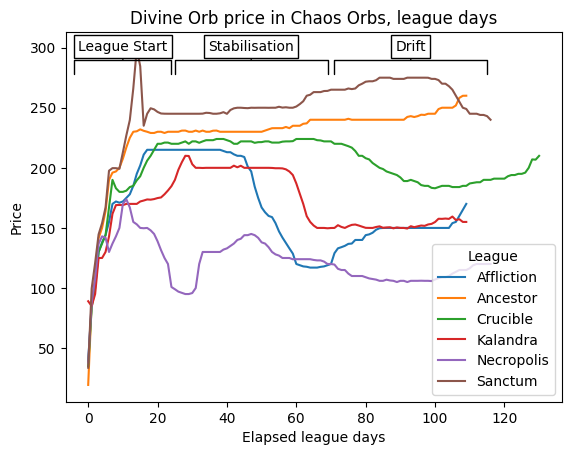

In [31]:
try:
    ax.clear()
except: 
    pass
    
ax = sns.lineplot(data=df_chart_divcha, x='Days Since Start of League', y='Value', hue='League')
u = plt.title("Divine Orb price in Chaos Orbs, league days")
w = plt.xlabel("Elapsed league days")
y = plt.ylabel("Price")

u = ax.annotate('League Start', xy=(10, 290), xytext=(10, 295), 
            fontsize=10, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white', color='k'),
            arrowprops=dict(arrowstyle='-[, widthB=3.5, lengthB=1', lw=1, color='k'))
u = ax.annotate('Stabilisation', xy=(47, 290), xytext=(47, 295), 
            fontsize=10, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white', color='k'),
            arrowprops=dict(arrowstyle='-[, widthB=5.5, lengthB=1', lw=1, color='k'))
u = ax.annotate('Drift', xy=(93, 290), xytext=(93, 295), 
            fontsize=10, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white', color='k'),
            arrowprops=dict(arrowstyle='-[, widthB=5.5, lengthB=1', lw=1, color='k'))



<i> Despite these apparent phases, it's clear that there are league variations. For example, the price of Divine Orbs spikes then falls very quickly before stabilising, a behaviour unlike other leagues. Likewise, the price in the Affliction league falls dramatically despite the overall trend of price stabiltiy in days 40+. <br>
Let's see if the trends are replicated with other prices.
</i>

In [19]:
df_chart_chrcha = league_currency[(league_currency['Get'] == "Chromatic Orb") & (league_currency['Pay'] == "Chaos Orb")]

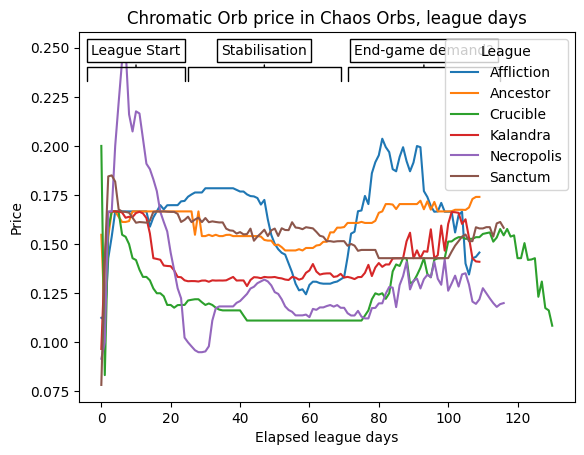

In [32]:
try:
    ax.clear()
except: 
    pass

ax = sns.lineplot(data=df_chart_chrcha, x='Days Since Start of League', y='Value', hue='League')
u = plt.title("Chromatic Orb price in Chaos Orbs, league days")
w = plt.xlabel("Elapsed league days")
y = plt.ylabel("Price")

u = ax.annotate('League Start', xy=(10, 0.240), xytext=(10, 0.245), 
            fontsize=10, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white', color='k'),
            arrowprops=dict(arrowstyle='-[, widthB=3.5, lengthB=1', lw=1, color='k'))
u = ax.annotate('Stabilisation', xy=(47, 0.240), xytext=(47, 0.245), 
            fontsize=10, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white', color='k'),
            arrowprops=dict(arrowstyle='-[, widthB=5.5, lengthB=1', lw=1, color='k'))
u = ax.annotate('End-game demand?', xy=(93, 0.240), xytext=(93, 0.245), 
            fontsize=10, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white', color='k'),
            arrowprops=dict(arrowstyle='-[, widthB=5.5, lengthB=1', lw=1, color='k'))



<i> Chromatic Orbs are significantly more common than Chaos Orbs in Path of Exile, and the relative price reflects that. Whereas a Divine Orb was worth 250 Chaos Orbs in some leagues, a Chromatic Orb is generally worth around and eighth of a Chaos Orb.
<ul>
    <li> <i>Like the Chaos/Divine conversion rate, Chaos/Chromatic exhibits rapid change very early in the league, and a period of stability afterwards.</li>
    <li> <i>However, after around 80 days in we can observe spiky unpredictability in the rate - in Affliction league it climbs to higher than its starting price, for example, before spiking around and falling rapidly again.</li>
    <li> <i>Chromatic Orbs tend to be used in bulk when players have reached end-game content (mapping) much more so than in the early and middle game. It is possible the rises in price later in the league reflects more players reaching end-game content and increasing the demand.</li>
</ul>

In [21]:
df_chart_chachis = league_currency[(league_currency['Pay'] == "Chaos Orb") & (league_currency['Get'] == "Cartographer\'s Chisel")]
df_chart_chischa = league_currency[(league_currency['Get'] == "Chaos Orb") & (league_currency['Pay'] == "Cartographer\'s Chisel")]

<h2> Arbitrage </h2>

Arbitrage is a market practise whereby one can buy and sell different goods or commodities across different markets, in order to take advantage of differing prices across those markets. In the real world, this is often the case with forex markets, where differing prices mean I can buy a currency in one market and sell it back to my original currency in another market, resulting in me having the more of the currency I started with at no risk.

In real world markets, arbitrage is either illegal, or exploited very quickly by actors, pushing the price down to a point where arbitrage is not possible.
<br>
Let's see if we can find any arbitrage opportunities in PoE.
<br>
As mentioned in the parent article, there is only one market in each PoE league, so our actors cannot try to exercise arbitrage between markets as in our example. However, we do still have multiple floating currency item prices within the same market, so if actors can buy a currency item and see it back at a profit (potentially via a third currency) then arbitrage is still possible.
<br>
In general, we should expect the price of currency A in currency B multiplied by the price of currency B in A to equal 1. Where that's not the case, there's scope for arbitrage.

<i> Let's start with Divine Orbs and Chaos Orbs. This is one of the most demanded currency pairs after all, and usually a highly valuable one. <br>
Here, we calculate the product of the two prices on a given league day. If the market is working effectively it should be close or equal to 1. </i>

In [22]:
df_chart_divcha = league_currency[(league_currency['Get'] == "Divine Orb") & (league_currency['Pay'] == "Chaos Orb")]
df_chart_chardiv = league_currency[(league_currency['Get'] == "Chaos Orb") & (league_currency['Pay'] == "Divine Orb")]

df_chart_divcha = df_chart_divcha.sort_values(by=['League', 'Date'], ascending=True)
df_chart_chardiv = df_chart_chardiv.sort_values(by=['League', 'Date'], ascending=True)

df_chart_relative_divchar = df_chart_divcha.merge(right=df_chart_chardiv[['League', 'Date', 'Value', 'Days Since Start of League']],
                                                   how='left',
                                                    on=['League', 'Date', 'Days Since Start of League']
)
df_chart_relative_divchar['Relative Price'] = df_chart_relative_divchar['Value_x'] * df_chart_relative_divchar['Value_y']

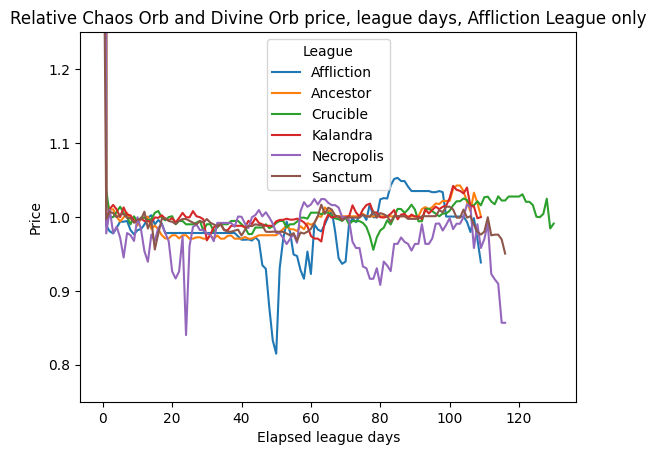

In [33]:
try:
    ax.clear()
except: 
    pass

ax = sns.lineplot(data=df_chart_relative_divchar, x='Days Since Start of League', y='Relative Price', hue='League')
u = plt.title("Relative Chaos Orb and Divine Orb price, league days, Affliction League only")
w = plt.xlabel("Elapsed league days")
y = plt.ylabel("Price")

#there's a huge spike at day 1 which distorts the graph somewhat, so I've filtered it out
y = plt.ylim(0.75, 1.25)



<i> If we look past the spike on Day 1 of each league, the relative price of the pair stays relatively close to one. Some leagues are less stable, though - we can see that in the Affliction and Necropolis Leagues the prices are significantly less responsive, and large price differentials open up.
<br><br>
Let's look at another pair - Cartographer's Chisels and Chaos Orbs.

In [24]:
df_chart_chachis = df_chart_chachis.sort_values(by=['League', 'Date'], ascending=True)
df_chart_chicha = df_chart_chischa.sort_values(by=['League', 'Date'], ascending=True)

In [25]:
df_chart_relative_chischa = df_chart_chachis.merge(right=df_chart_chicha[['League', 'Date', 'Value', 'Days Since Start of League']],
                                                   how='left',
                                                    on=['League', 'Date', 'Days Since Start of League']
)
df_chart_relative_chischa['Relative Price'] = df_chart_relative_chischa['Value_x'] * df_chart_relative_chischa['Value_y']

<i> The below is a good example of an opportunity for arbitrage. If I start with one Chaos Orb, I can trade it for 10 Chisels (each chisel is worth 0.1 Chaos Orbs, in the Value_x column). Then, with my 10 chisels, I can spend 9 of them to buy a Chaos Orb (each Chaos Orb is worth 9 chisels, in the Value_y column). Having completed my trade, I now have 1 Chaos Orb and 1 Chisel, and undertook no risk to do so. <br>
That the Relative Price column is less than one indicates that I can arbitrage on Chaos Orbs through Chisels; if it were greater than one the converse would be true.

In [26]:
df_chart_relative_chischa[(df_chart_relative_chischa['League']=='Affliction') & (df_chart_relative_chischa['Date'] == pd.to_datetime('2023-12-10'))]

,League,Date,Get,Pay,Value_x,Confidence,Days Since Start of League,Value_y,Relative Price
2,Affliction,2023-12-10,Cartographer's Chisel,Chaos Orb,0.1,High,2,9.0,0.9


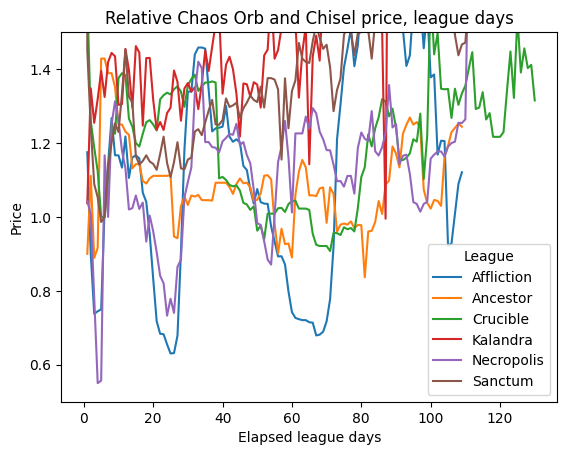

In [34]:
try:
    ax.clear()
except: 
    pass

ax = sns.lineplot(data=df_chart_relative_chischa, x='Days Since Start of League', y='Relative Price', hue='League')
u = plt.title("Relative Chaos Orb and Chisel price, league days")
w = plt.xlabel("Elapsed league days")
y = plt.ylabel("Price")

y = plt.ylim(0.5, 1.5)



<i> Much busier! It's all over the place. Let's focus in on two leagues - Kalandra and Affliction.

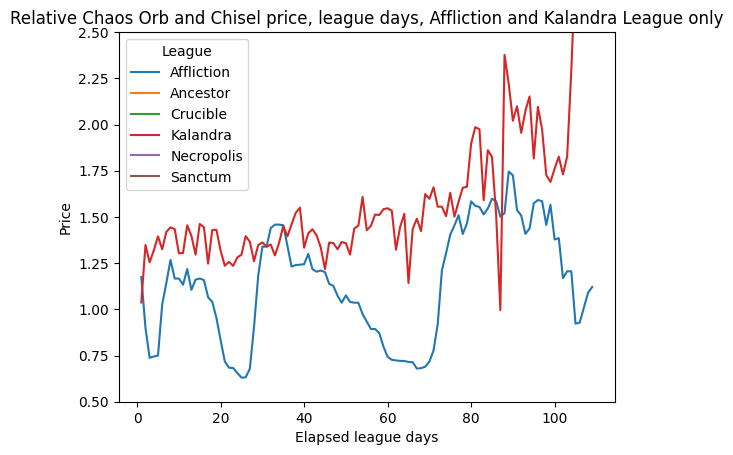

In [35]:
try:
    ax.clear()
except: 
    pass

ax = sns.lineplot(data=df_chart_relative_chischa[df_chart_relative_chischa['League'].isin(['Affliction', 'Kalandra'])], x='Days Since Start of League', y='Relative Price', hue='League')
u = plt.title("Relative Chaos Orb and Chisel price, league days, Affliction and Kalandra League only")
w = plt.xlabel("Elapsed league days")
y = plt.ylabel("Price")

y = plt.ylim(0.5, 2.5)

<i> I've cut off the end of this graph where the Kalandra League price rises to 4.5 and higher, for readability. <br>
What can we see here?
<ul>
    <li><i>The Affliction League price is quite unpredictable, and cycles between arbitrage being available from Chaos Orbs to Chisels (<1) and the other way round (>1).</i></li>
    <li><i>The Kalandra league relative price is unstable, but remains constantly high and rises throughout the league. While I cannot find a game mechanic that accounts for it, presumable this indicates that demand for Chisels was high enough throughout the league that the price could never equalise, or that players would not buy Chaos Orbs for Chisels consistently enough to prevent the price from rising.</i></li>
</ul>